# Circular equatorial orbits in Kerr spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

In [1]:
%display latex

## Effective potential $\mathcal{V}(r)$

In [2]:
a = var('a')
r = var('r')
eps = var('eps', latex_name=r'\varepsilon')
l = var('l', latex_name=r'\ell') 

In [3]:
V(a, eps, l, r) = (1 - eps^2 - 2/r + (l^2 + a^2*(1 - eps^2))/r^2
                    - 2*(l - a*eps)^2/r^3)
V

(a, eps, l, r) |--> -eps^2 - 2*(a*eps - l)^2/r^3 - ((eps^2 - 1)*a^2 - l^2)/r^2 - 2/r + 1

## Constraint $r^2 - 3 m r \pm 2 a \sqrt{m r} > 0$

In [4]:
f(r, a) = r*(r-3) + 2*a*sqrt(r)
f

(r, a) |--> (r - 3)*r + 2*a*sqrt(r)

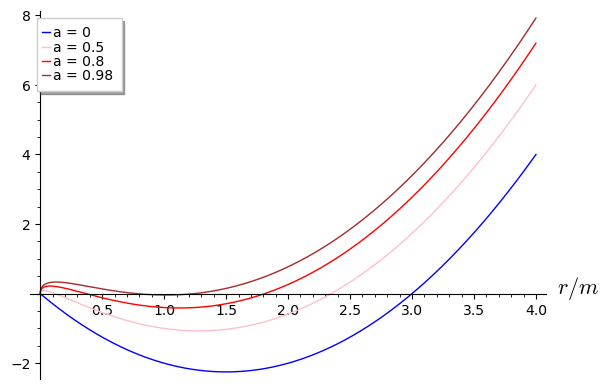

In [5]:
g1 = plot(f(r, 0), (r, 0, 4), legend_label='a = 0', axes_labels=[r'$r/m$', ''])
g2 = plot(f(r, 0.5), (r, 0, 4), color='pink', legend_label='a = 0.5')
g3 = plot(f(r, 0.8), (r, 0, 4), color='red', legend_label='a = 0.8')
g4 = plot(f(r, 0.98), (r, 0, 4), color='brown', legend_label='a = 0.98')
g1 + g2 + g3 + g4

In [6]:
f(r, a) = r*(r-3) - 2*a*sqrt(r)
f

(r, a) |--> (r - 3)*r - 2*a*sqrt(r)

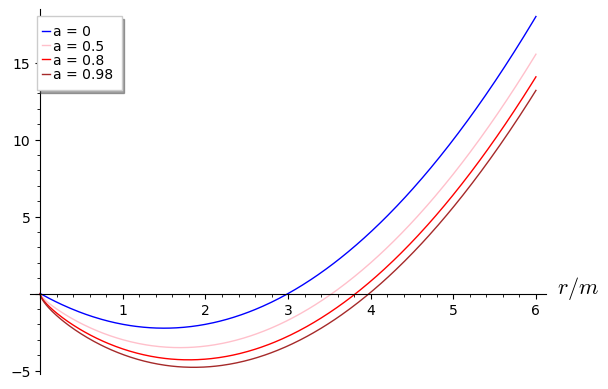

In [7]:
g1 = plot(f(r, 0), (r, 0, 6), legend_label='a = 0', axes_labels=[r'$r/m$', ''])
g2 = plot(f(r, 0.5), (r, 0, 6), color='pink', legend_label='a = 0.5')
g3 = plot(f(r, 0.8), (r, 0, 6), color='red', legend_label='a = 0.8')
g4 = plot(f(r, 0.98), (r, 0, 6), color='brown', legend_label='a = 0.98')
g1 + g2 + g3 + g4

## Existence of circular orbits: boundaries $r_{\rm min}^\pm$ and $r_*$

In [8]:
r_min_p(a) = 4*cos(acos(-a)/3)^2
r_min_p

a |--> 4*cos(1/3*arccos(-a))^2

In [9]:
r_min_m(a) = 4*cos(acos(a)/3)^2
r_min_m

a |--> 4*cos(1/3*arccos(a))^2

In [10]:
rp(a) = 1 + sqrt(1 - a^2)
rm(a) = 1 - sqrt(1 - a^2)

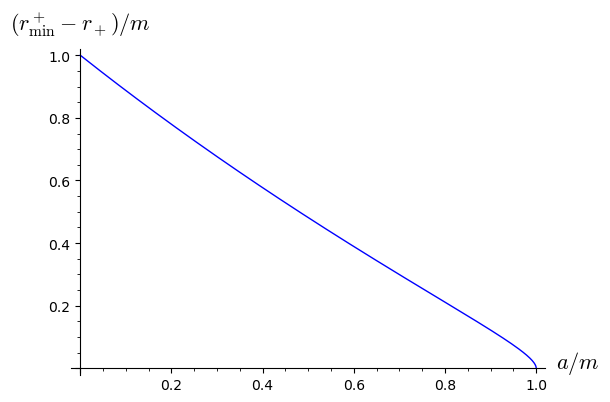

In [11]:
plot(r_min_p(a) - rp(a), (a, 0, 1), 
     axes_labels=[r'$a/m$', r'$(r_{\rm min}^+ - r_+)/m$']) 

In [12]:
rs(a) = 4*cos(acos(-a)/3 + 4*pi/3)^2
rs

a |--> 4*cos(4/3*pi + 1/3*arccos(-a))^2

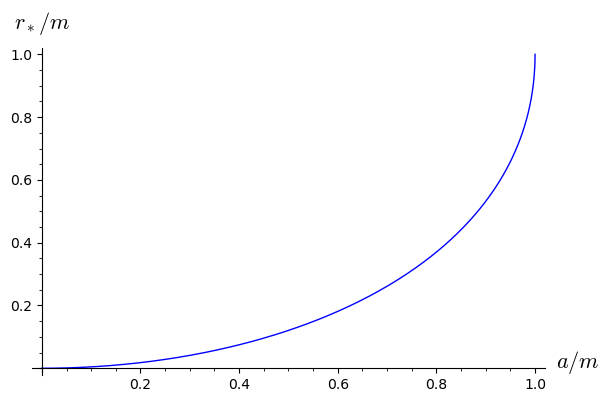

In [13]:
plot(rs, (0, 1), axes_labels=[r'$a/m$', r'$r_*/m$']) 

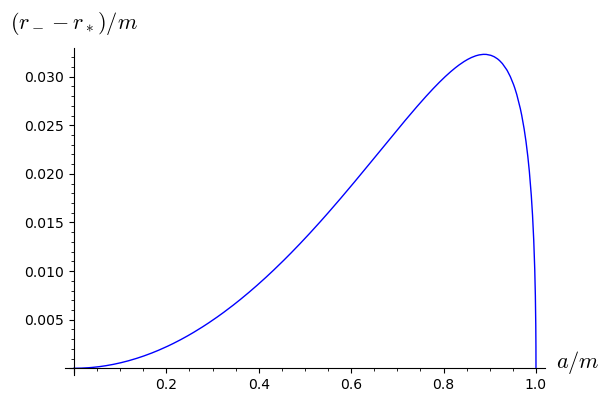

In [14]:
plot(rm(a) - rs(a), (a, 0, 1), 
     axes_labels=[r'$a/m$', r'$(r_- - r_*)/m$']) 

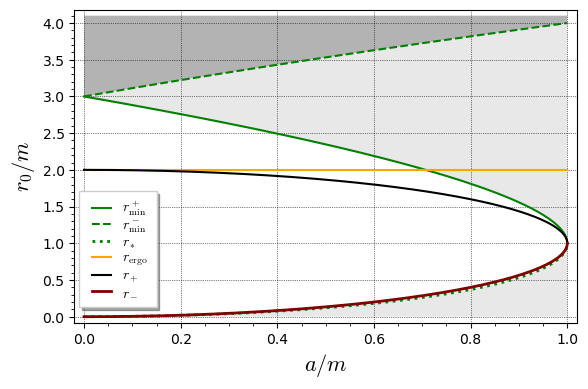

In [15]:
graph = plot(r_min_p, (0, 1), axes_labels=[r'$a/m$', r'$r_0/m$'], 
             color='green', thickness=1.5, legend_label=r'$r_{\rm min}^+$', 
             fill=4.1, fillcolor='lightgrey',
             frame=True, gridlines=True, axes=False) \
+ plot(r_min_m, (0, 1), linestyle='--', color='green', thickness=1.5, 
       legend_label=r'$r_{\rm min}^-$', fill=4.1, fillcolor='grey') \
+ plot(rs, (0, 1), color='green', linestyle=':', thickness=2, 
       legend_label=r'$r_*$', fill=0, fillcolor='lightgrey') \
+ plot(lambda x: 2, (0, 1), color='orange', thickness=1.5, legend_label=r'$r_{\rm ergo}$') \
+ plot(rp, (0, 1), color='black', thickness=1.5, legend_label=r'$r_+$') \
+ plot(rm, (0, 1), color='maroon', thickness=2, legend_label=r'$r_-$') 
graph.set_legend_options(handlelength=2, loc=(0.01, 0.05))
graph

In [16]:
graph.save('gek_circ_orb_lim.pdf')

### ISCO

In [17]:
Z1 = 1 + (1 - a^2)^(1/3)*((1 + a)^(1/3) + (1 - a)^(1/3))
Z1

(-a^2 + 1)^(1/3)*((a + 1)^(1/3) + (-a + 1)^(1/3)) + 1

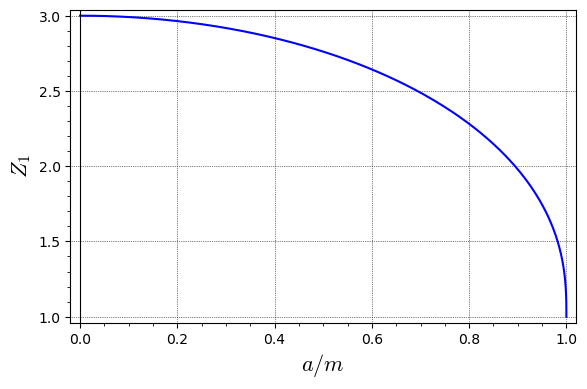

In [18]:
g = plot(Z1, (a, 0, 1), axes_labels=[r"$a/m$", r"$Z_1$"],
         thickness=1.5, frame=True, gridlines=True, axes=True)
g

In [19]:
g.save("gek_Z1.pdf")

In [20]:
Z2 = sqrt(Z1^2 + 3*a^2)
Z2

sqrt(((-a^2 + 1)^(1/3)*((a + 1)^(1/3) + (-a + 1)^(1/3)) + 1)^2 + 3*a^2)

In [21]:
r_isco_p(a) = 3 + Z2 - sqrt((3 - Z1)*(3 + Z1 + 2*Z2))
r_isco_m(a) = 3 + Z2 + sqrt((3 - Z1)*(3 + Z1 + 2*Z2))

## Energy and angular momentum as functions of $r_0$

In [22]:
sAp = sqrt(r^2 - 3*r + 2*a*sqrt(r))
sAm = sqrt(r^2 - 3*r - 2*a*sqrt(r))
eps_p(a, r) = (r^2 - 2*r + a*sqrt(r))/(r*sAp)
eps_m(a, r) = (r^2 - 2*r - a*sqrt(r))/(r*sAm)

In [23]:
eps_p(a, r)

(r^2 + a*sqrt(r) - 2*r)/(sqrt(r^2 + 2*a*sqrt(r) - 3*r)*r)

In [24]:
eps_m(a, r)

(r^2 - a*sqrt(r) - 2*r)/(sqrt(r^2 - 2*a*sqrt(r) - 3*r)*r)

In [25]:
l_p(a, r) = (r^2 + a^2 - 2*a*sqrt(r))/(sqrt(r)*sAp)
l_m(a, r) = -(r^2 + a^2 + 2*a*sqrt(r))/(sqrt(r)*sAm)

In [26]:
l_p(a, r)

(a^2 + r^2 - 2*a*sqrt(r))/(sqrt(r^2 + 2*a*sqrt(r) - 3*r)*sqrt(r))

In [27]:
l_m(a, r)

-(a^2 + r^2 + 2*a*sqrt(r))/(sqrt(r^2 - 2*a*sqrt(r) - 3*r)*sqrt(r))

In [28]:
num_l_p(a, r) = r^2 + a^2 - 2*a*sqrt(r)

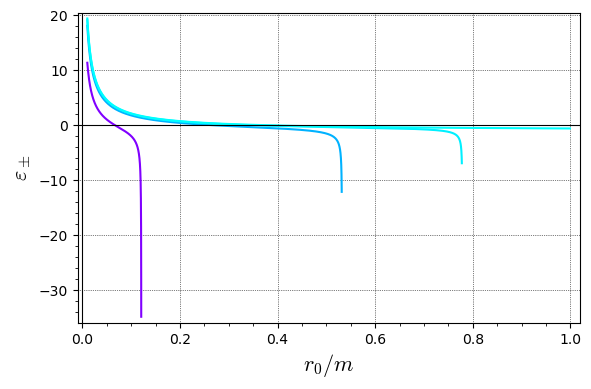

In [29]:
al = [0., 0.5, 0.9, 0.98, 1]
ah = -2
g = Graphics()
for a1 in al[1:]:
    g += plot(eps_p(a1, r), (r, 0.01, 0.999*rs(a1)), color=hue(a1/ah), 
              linestyle='-', thickness=1.5,
              axes_labels=[r"$r_0/m$", r"$\varepsilon_\pm$"], 
              frame=True, gridlines=True, axes=True)
g

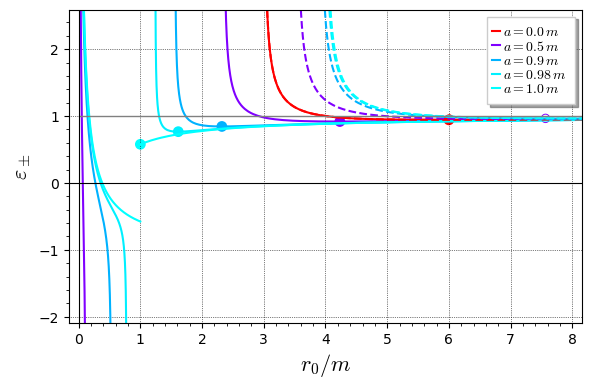

In [30]:
r_max = 10
for a1 in al:
    g += plot(eps_p(a1, r), (r, 1.001*r_min_p(a1), r_max), color=hue(a1/ah), 
              thickness=1.5, legend_label=r"$a = {}\, m$".format(float(a1)))
    ri = 1.00001*r_isco_p(a1)  # 1.00001 to avoid 0/0 for a1=1
    g += point((ri, eps_p(a1, ri)), color=hue(a1/ah), size=60)
for a1 in al:
    g += plot(eps_m(a1, r), (r, 1.001*r_min_m(a1), r_max), thickness=1.5,
              linestyle='--', color=hue(a1/ah))
    ri = r_isco_m(a1)
    if ri < r_max:
        g += point((ri, eps_m(a1, ri)), color=hue(a1/ah), marker=r'$\circ$', size=60)
g += line([(0,1), (r_max, 1)], color='grey')
show(g, ymin=-2, ymax=2.5, xmax=8)

In [31]:
g.save('gek_eps_circ_orb.pdf', ymin=-2, ymax=2.5, xmax=8)

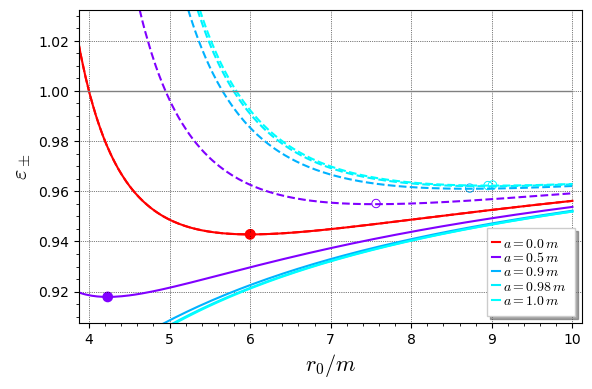

In [32]:
show(g, xmin=4, xmax=r_max, ymin=0.91, ymax=1.03)

In [33]:
g.save('gek_eps_circ_orb_zoom.pdf', xmin=4, xmax=r_max, ymin=0.91, ymax=1.03)

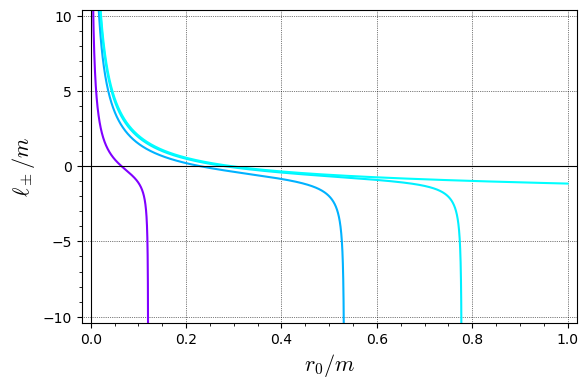

In [34]:
g = Graphics()
for a1 in al[1:]:
    g += plot(l_p(a1, r), (r, 0.001, rs(a1)), color=hue(a1/ah), 
              linestyle='-', thickness=1.5, 
              axes_labels=[r"$r_0/m$", r"$\ell_\pm/m$"],
              frame=True, gridlines=True, axes=True)
show(g, ymin=-10, ymax=10)

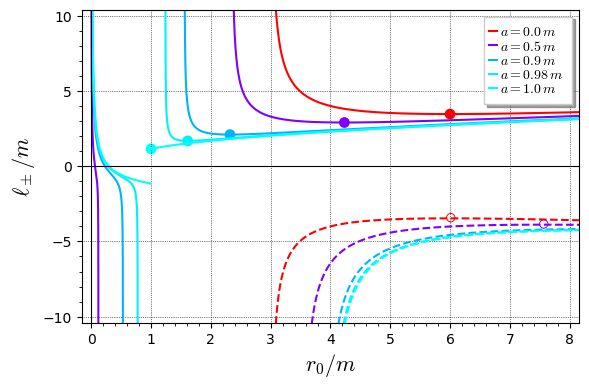

In [35]:
for a1 in al:
    g += plot(l_p(a1, r), (r, 1.001*r_min_p(a1), r_max), color=hue(a1/ah), 
              thickness=1.5, legend_label=r"$a = {}\, m$".format(float(a1)))
    ri = 1.00001*r_isco_p(a1)  # 1.00001 to avoid 0/0 for a1=1
    g += point((ri, l_p(a1, ri)), color=hue(a1/ah), size=60)
for a1 in al:
    g += plot(l_m(a1, r), (r, 1.001*r_min_m(a1), r_max), thickness=1.5,
              linestyle='--', color=hue(a1/ah)) 
    ri = r_isco_m(a1)
    if ri < r_max:
        g += point((ri, l_m(a1, ri)), color=hue(a1/ah), marker=r'$\circ$', size=60)
show(g, xmax=8, ymin=-10, ymax=10)

In [36]:
g.save('gek_ell_circ_orb.pdf', xmax=8, ymin=-10, ymax=10)

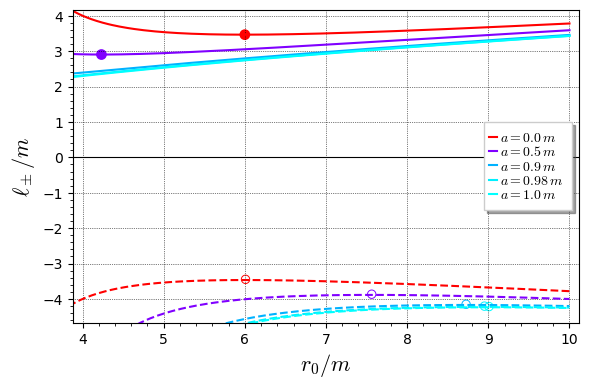

In [37]:
show(g, xmin=4, xmax=r_max, ymin=-4.5, ymax=4)

In [38]:
g.save('gek_ell_circ_orb_zoom.pdf', xmin=4, xmax=r_max, ymin=-4.5, ymax=4)

### Orbital angular velocity

In [39]:
omega_p(a, r) = 1/(r^(3/2) + a)
omega_m(a, r) = -1/(r^(3/2) - a)
omega_p(a, r), omega_m(a, r)

(1/(r^(3/2) + a), -1/(r^(3/2) - a))

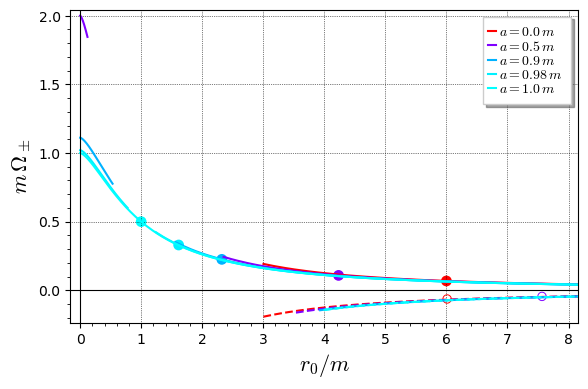

In [40]:
r_max = 10
g = Graphics()
for a1 in al[1:]:
    g += plot(omega_p(a1, r), (r, 0.001, rs(a1)), color=hue(a1/ah), 
              linestyle='-', thickness=1.5, 
              axes_labels=[r"$r_0/m$", r"$m\, \Omega_\pm$"],
              frame=True, gridlines=True, axes=True)
for a1 in al:
    g += plot(omega_p(a1, r), (r, 1.001*r_min_p(a1), r_max), color=hue(a1/ah), 
              thickness=1.5, legend_label=r"$a = {}\, m$".format(float(a1)))
    ri = 1.00001*r_isco_p(a1)  # 1.00001 to avoid 0/0 for a1=1
    g += point((ri, omega_p(a1, ri)), color=hue(a1/ah), size=60)
for a1 in al:
    g += plot(omega_m(a1, r), (r, 1.001*r_min_m(a1), r_max), thickness=1.5,
              linestyle='--', color=hue(a1/ah)) 
    ri = r_isco_m(a1)  
    g += point((ri, omega_m(a1, ri)), marker=r'$\circ$', color=hue(a1/ah), size=60)
show(g, xmax=8)

In [41]:
g.save('gek_omega_circ_orb.pdf', xmax=8)

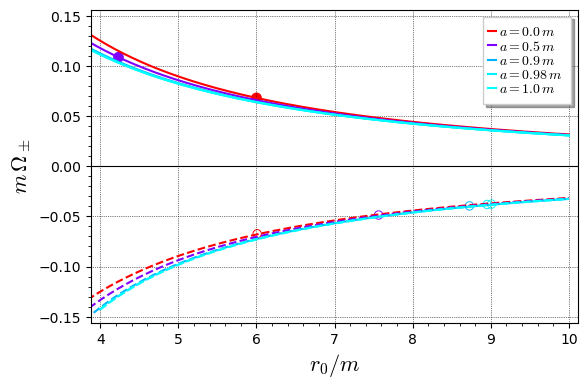

In [42]:
show(g, xmin=4, xmax=r_max, ymin=-0.15, ymax=0.15)

In [43]:
g.save('gek_omega_circ_orb_zoom.pdf', xmin=4, xmax=r_max, ymin=-0.15, ymax=0.15)

### Linear velocity with respect to the ZAMO

In [44]:
V_ZAMO_p(a, r) = (r^2 - 2*a*sqrt(r) + a^2)/((r^(3/2) + a)*sqrt(r^2 - 2*r + a^2))
V_ZAMO_p(a, r)

(a^2 + r^2 - 2*a*sqrt(r))/(sqrt(a^2 + r^2 - 2*r)*(r^(3/2) + a))

In [45]:
V_ZAMO_m(a, r) = -(r^2 + 2*a*sqrt(r) + a^2)/((r^(3/2) - a)*sqrt(r^2 - 2*r + a^2))
V_ZAMO_m(a, r)

-(a^2 + r^2 + 2*a*sqrt(r))/(sqrt(a^2 + r^2 - 2*r)*(r^(3/2) - a))

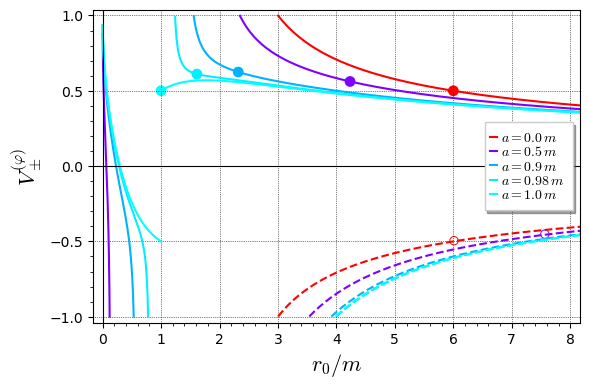

In [46]:
r_max = 10
g = Graphics()
for a1 in al[1:]:
    g += plot(V_ZAMO_p(a1, r), (r, 0.001, rs(a1)), color=hue(a1/ah), 
              linestyle='-', thickness=1.5, 
              axes_labels=[r"$r_0/m$", r"$V_\pm^{(\varphi)}$"],
              frame=True, gridlines=True, axes=True)
for a1 in al:
    g += plot(V_ZAMO_p(a1, r), (r, 1.001*r_min_p(a1), r_max), color=hue(a1/ah), 
              thickness=1.5, legend_label=r"$a = {}\, m$".format(float(a1)))
    ri = 1.00001*r_isco_p(a1)  # 1.00001 to avoid 0/0 for a1=1
    g += point((ri, V_ZAMO_p(a1, ri)), color=hue(a1/ah), size=60)
for a1 in al:
    g += plot(V_ZAMO_m(a1, r), (r, 1.001*r_min_m(a1), r_max), thickness=1.5,
              linestyle='--', color=hue(a1/ah)) 
    ri = r_isco_m(a1)  
    g += point((ri, V_ZAMO_m(a1, ri)), marker=r'$\circ$', color=hue(a1/ah), size=60)
show(g, xmax=8)

In [47]:
g.save('gek_v_zamo_circ_orb.pdf', xmax=8)

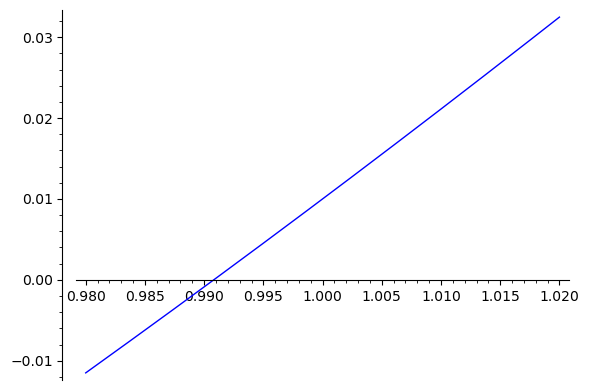

In [48]:
a1 = 0.9
plot(r^2 - 2*a1*sqrt(r) + a1^2, (r, 0.98, 1.02))

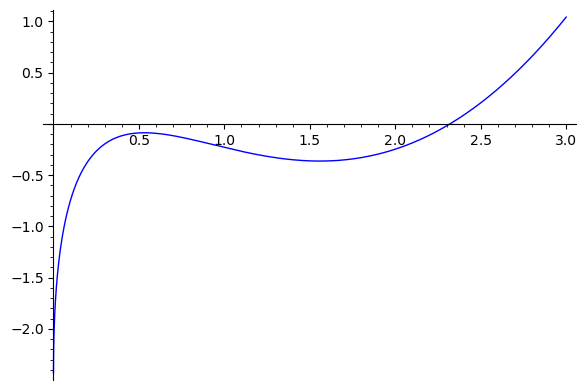

In [49]:
plot(r^2 - 6*r - 3*a1^2 + 8*a1*sqrt(r), (r, 0, 3))

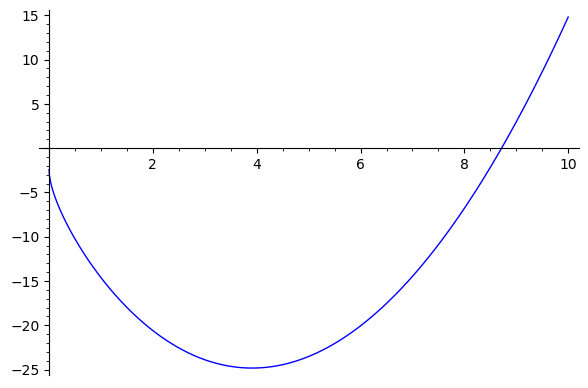

In [50]:
plot(r^2 - 6*r - 3*a1^2 - 8*a1*sqrt(r), (r, 0, 10))

## Behaviour of the function $\mathcal{V}(r)$ near a circular orbit

In [51]:
a1 = 0.9
r_isco_p(a1)

2.32088304176189

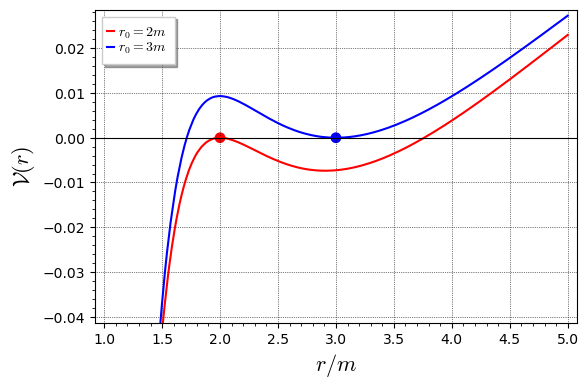

In [52]:
r1 = 2.
eps1 = eps_p(a1, r1)
l1 = l_p(a1, r1)
V1(r) = V(a1, eps1, l1, r)
g = plot(V1, (1, 5), color="red", thickness=1.5, legend_label=r"$r_0 = 2m$",
         axes_labels=[r"$r/m$", r"$\mathcal{V}(r)$"],
         frame=True, gridlines=True, axes=True)
g += point((r1, 0), color="red", size=60)
r1 = 3.
eps1 = eps_p(a1, r1)
l1 = l_p(a1, r1)
V1(r) = V(a1, eps1, l1, r)
g += plot(V1, (1, 5), color="blue", thickness=1.5, legend_label=r"$r_0 = 3m$")
g += point((r1, 0), color="blue", size=60)
show(g, ymin=-0.04)

In [53]:
g.save('gek_V_stability.pdf', ymin=-0.04)

Stability of orbits with $r_0 < r_*$:

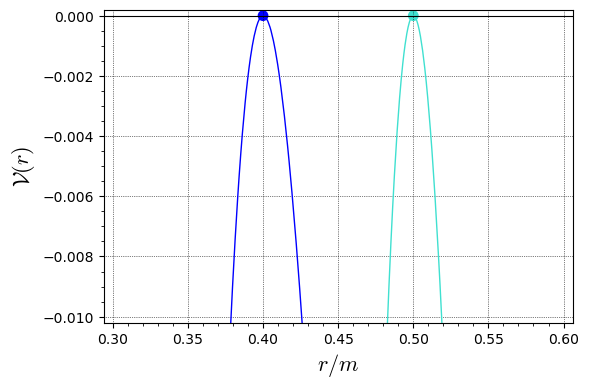

In [54]:
g = Graphics()
for r1, color in zip([0.4, 0.5], ['blue', 'turquoise']):
    eps1 = eps_p(a1, r1)
    l1 = l_p(a1, r1)
    V1(r) = V(a1, eps1, l1, r)
    g += plot(V1, (0.3, 0.6), color=color, axes_labels=[r"$r/m$", r"$\mathcal{V}(r)$"],
         frame=True, gridlines=True, axes=True)
    g += point((r1, 0), color=color, size=60)
show(g, ymin=-0.01)

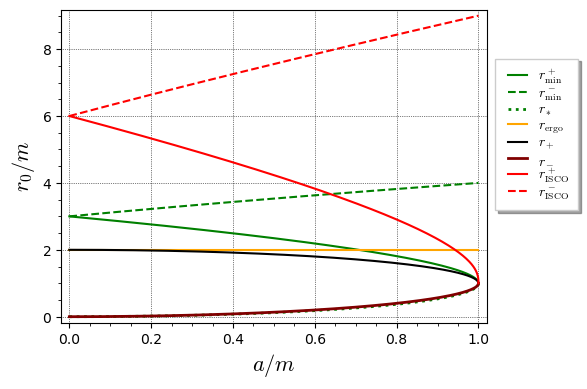

In [55]:
graph = plot(r_min_p, (0, 1), axes_labels=[r'$a/m$', r'$r_0/m$'], 
             color='green', thickness=1.5, legend_label=r'$r_{\rm min}^+$',
             frame=True, gridlines=True, axes=False) \
        + plot(r_min_m, (0, 1), linestyle='--', color='green', thickness=1.5, 
               legend_label=r'$r_{\rm min}^-$') \
        + plot(rs, (0, 1), color='green', linestyle=':', thickness=2, 
               legend_label=r'$r_*$') \
        + plot(lambda x: 2, (0, 1), color='orange', thickness=1.5, legend_label=r'$r_{\rm ergo}$') \
        + plot(rp, (0, 1), color='black', thickness=1.5, legend_label=r'$r_+$') \
        + plot(rm, (0, 1), color='maroon', thickness=2, legend_label=r'$r_-$') 
graph += plot(r_isco_p, (0, 1), color='red', thickness=1.5, legend_label=r'$r_{\rm ISCO}^+$') \
         + plot(r_isco_m, (0, 1), color='red', linestyle='--', thickness=1.5, 
                legend_label=r'$r_{\rm ISCO}^-$')
graph.set_legend_options(handlelength=2, loc=(1.02, 0.36))
graph

### Check that the ISCO correspond to a minimum of $\varepsilon_\pm(r_0)$ and $\ell_\pm(r_0)$

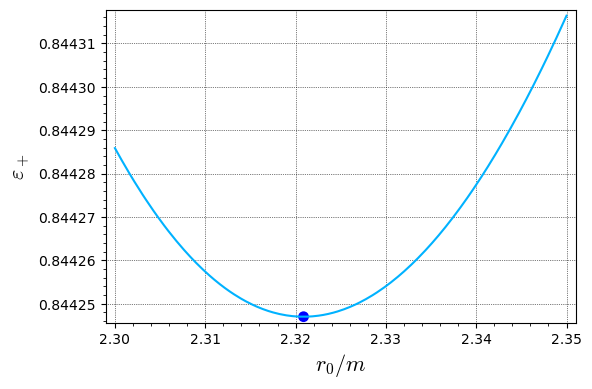

In [56]:
a1 = 0.9
g = plot(eps_p(a1, r), (r, 2.3, 2.35), color=hue(a1/ah), 
              linestyle='-', thickness=1.5,
              axes_labels=[r"$r_0/m$", r"$\varepsilon_+$"], 
              frame=True, gridlines=True, axes=True)
ri = r_isco_p(a1)
g += point((ri , eps_p(a1, ri)), color="blue", size=60)
g

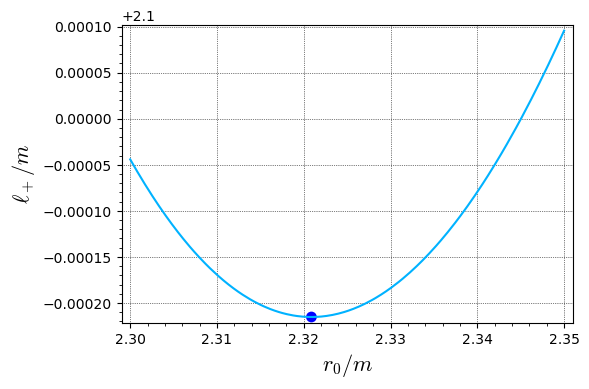

In [57]:
a1 = 0.9
g = plot(l_p(a1, r), (r, 2.3, 2.35), color=hue(a1/ah), 
              linestyle='-', thickness=1.5,
              axes_labels=[r"$r_0/m$", r"$\ell_+/m$"], 
              frame=True, gridlines=True, axes=True)
ri = r_isco_p(a1)
g += point((ri , l_p(a1, ri)), color="blue", size=60)
g

### Marginally bound circular orbit

In [58]:
r_mb_p(a) = 2 - a + 2*sqrt(1 - a)
r_mb_p

a |--> -a + 2*sqrt(-a + 1) + 2

In [59]:
r_mb_m(a) = 2 + a + 2*sqrt(1 + a)
r_mb_m

a |--> a + 2*sqrt(a + 1) + 2

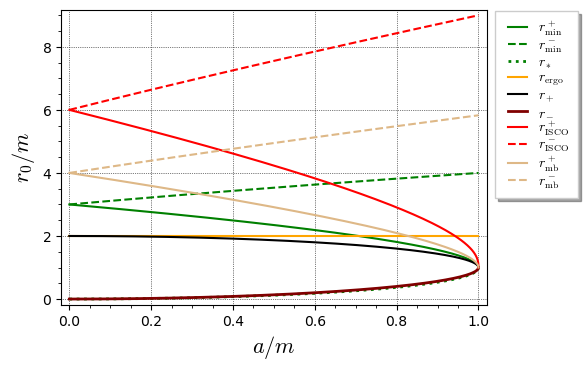

In [60]:
graph += plot(r_mb_p, (0, 1), color='burlywood', thickness=1.5, 
              legend_label=r'$r_{\rm mb}^+$') \
         + plot(r_mb_m, (0, 1), color='burlywood', linestyle='--', thickness=1.5, 
                legend_label=r'$r_{\rm mb}^-$')
graph

In [61]:
graph.save("gek_circ_orb_isco.pdf")